# Seyed Mohammad Amin Atyabi - 830402014 - HW 2 (Part 6)

In [1]:
import os
import numpy
import igraph
from scipy import io as sio

n_list = []
ng_list = []
l_list = []

for dataset in os.listdir('Data'):
    print(f'Dataset: {dataset.replace('.mat', '')}')

    file = sio.loadmat(f'Data/{dataset}')
    connections = file.get('A').A

    network = igraph.Graph.Adjacency(connections)
    components = network.components()
    components_size = components.sizes()
    giant_component_index = components_size.index(max(components_size))
    giant_component = components.subgraph(giant_component_index)

    giant_component_diameter = giant_component.diameter()
    mean_shortest_path = numpy.mean(giant_component.distances())

    n_list.append(len(network.vs))
    ng_list.append(len(giant_component.vs))
    l_list.append(giant_component_diameter)

    print(f'#Nodes = {len(network.vs)}')
    print(f'#Edges = {len(network.es)}')
    print(f'Diameter = {giant_component_diameter}')
    print(f'Average geodesic path = {giant_component_diameter}')
    print('------------------------------------------------------------------------------')

Dataset: American75
#Nodes = 6386
#Edges = 435324
Diameter = 9
Average geodesic path = 9
------------------------------------------------------------------------------
Dataset: Amherst41
#Nodes = 2235
#Edges = 181908
Diameter = 7
Average geodesic path = 7
------------------------------------------------------------------------------
Dataset: Auburn71
#Nodes = 18448
#Edges = 1947836
Diameter = 7
Average geodesic path = 7
------------------------------------------------------------------------------
Dataset: Baylor93
#Nodes = 12803
#Edges = 1359634
Diameter = 7
Average geodesic path = 7
------------------------------------------------------------------------------
Dataset: BC17
#Nodes = 11509
#Edges = 973934
Diameter = 9
Average geodesic path = 9
------------------------------------------------------------------------------
Dataset: Berkeley13
#Nodes = 22937
#Edges = 1704888
Diameter = 7
Average geodesic path = 7
---------------------------------------------------------------------------

MemoryError: 

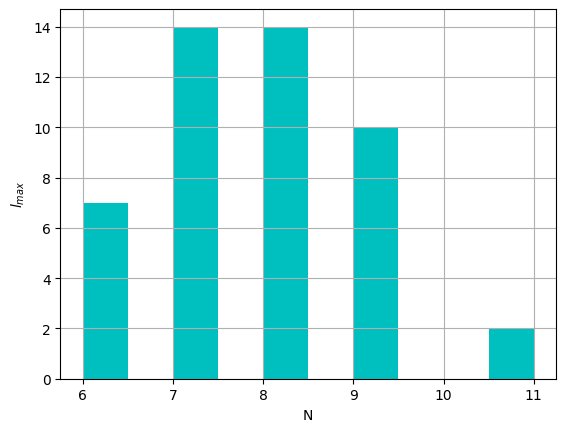

In [16]:
from matplotlib import pyplot as plt

plt.hist(l_list, color='c')
plt.xlabel('N')
plt.ylabel('$ l_{max} $')
plt.grid()
plt.show()

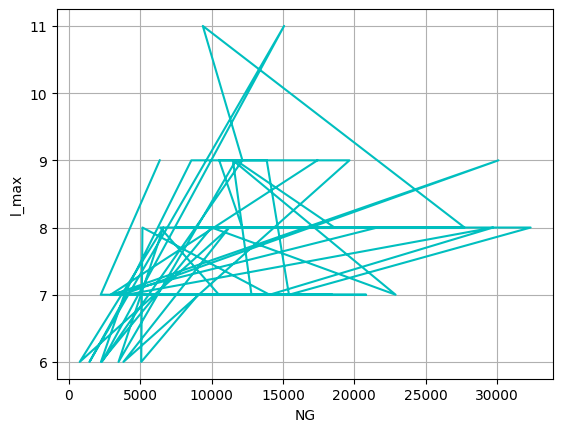

In [8]:
plt.plot(ng_list, l_list, color='c')
plt.xlabel('NG')
plt.ylabel('$ l_{max} $')
plt.grid()
plt.show()